## TEMPLATE MATCHING LOOP CODE

In [ ]:
!apt-get update
!apt install libgl1-mesa-glx -y
!pip install opencv-python --upgrade
!python -m pip install torchvision 

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]                
Get:3 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1592 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [994 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [844 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [25.8 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:10 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]
Get:13 http://archiv

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output

Change the **template_image** and the **test_image** using anything the data folder

FRAME 599


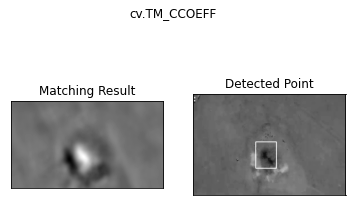

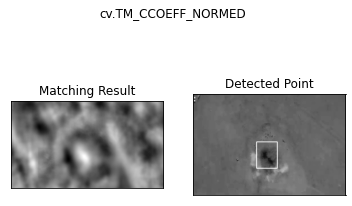

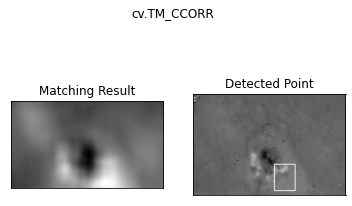

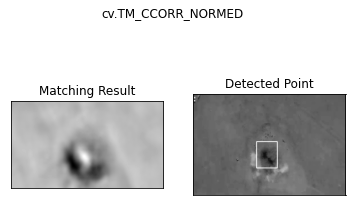

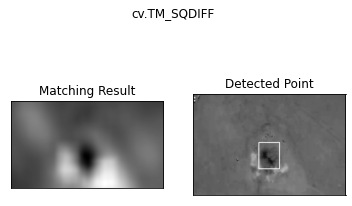

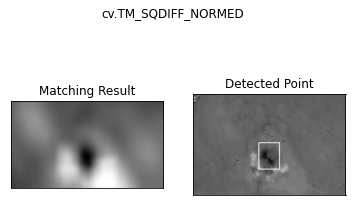

In [ ]:
for x in range (500,600):
    clear_output(wait=True)
    template_image='LaunchTestSat3.png'
    test_image='frame'+str(x)+'.jpg'

    img = cv.imread('../Data/VideoFrames/'+test_image,0)
    img2 = img.copy()
    template = cv.imread('../Data/Template_imgs/'+template_image,0)
    w, h = template.shape[::-1]

    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
                'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    print(f'FRAME {x}')
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left, bottom_right, 255, 2)
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()
    plt.close()